<a href="https://colab.research.google.com/github/vicaranq/exploring-paligemma-MLLM/blob/main/mplugOwl2_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Download image shown here: https://www.cnn.com/2022/12/21/business/messi-most-liked-instagram-post-intl-hnk/index.html

2. Upload it to: `/content/MESSI.jpg` in this google colab

In [95]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [96]:
!git clone https://github.com/vicaranq/exploring-paligemma-MLLM.git

Cloning into 'exploring-paligemma-MLLM'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), 4.72 KiB | 4.72 MiB/s, done.


# Install Packages

In [2]:
!git clone https://github.com/X-PLUG/mPLUG-Owl.git

Cloning into 'mPLUG-Owl'...
remote: Enumerating objects: 1227, done.
remote: Counting objects: 100% (268/268), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 1227 (delta 199), reused 156 (delta 133), pack-reused 959
Receiving objects: 100% (1227/1227), 30.29 MiB | 27.64 MiB/s, done.
Resolving deltas: 100% (430/430), done.


In [3]:
!pwd

/content


In [4]:
import sys
sys.path.append('/content/mPLUG-Owl/mPLUG-Owl2')

In [5]:
!pip install --upgrade pip
# !pip install icecream accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [6]:
!pip install -e /content/mPLUG-Owl/mPLUG-Owl2

Obtaining file:///content/mPLUG-Owl/mPLUG-Owl2
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.9/116.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.7/137.7 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This coul

In [7]:
import torch
from PIL import Image
import matplotlib.pyplot as plt

from transformers import TextStreamer
from transformers import AutoModel

from mplug_owl2.constants import IMAGE_TOKEN_INDEX, DEFAULT_IMAGE_TOKEN
from mplug_owl2.conversation import conv_templates, SeparatorStyle
from mplug_owl2.model.builder import load_pretrained_model
from mplug_owl2.mm_utils import process_images, tokenizer_image_token, get_model_name_from_path, KeywordsStoppingCriteria

# Get Model and Processor

In [8]:
model_path = 'MAGAer13/mplug-owl2-llama2-7b'
device = 'cpu'
if torch.cuda.is_available():
    device = torch.device("cuda")
device

device(type='cuda')

In [ ]:
# # Load model directly
# model = AutoModel.from_pretrained("MAGAer13/mplug-owl2-llama2-7b").to(device)

In [9]:
model_name = get_model_name_from_path(model_path)
# tokenizer, model, image_processor, context_len = load_pretrained_model(model_path, None, model_name, load_8bit=False, load_4bit=False, device="cuda") # model ~14GB/15GB in GPU
# tokenizer, model, image_processor, context_len = load_pretrained_model(model_path, None, model_name, load_8bit=True, load_4bit=False, device="cuda") #~8GB
tokenizer, model, image_processor, context_len = load_pretrained_model(model_path, None, model_name, load_8bit=False, load_4bit=True, device="cuda") # ~5 GB


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/749 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/5.05k [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/77.4k [00:00<?, ?B/s]

pytorch_model-1-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-10-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-11-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-12-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-13-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-14-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-15-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-16-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-17-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-18-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-19-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-2-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-20-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-21-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-22-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-23-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-24-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-25-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-26-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-27-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-28-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-29-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-3-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-30-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-31-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-32-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-33-of-33.bin:   0%|          | 0.00/1.30G [00:00<?, ?B/s]

pytorch_model-4-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-5-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-6-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-7-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-8-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-9-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/33 [00:00<?, ?it/s]

Some weights of MPLUGOwl2LlamaForCausalLM were not initialized from the model checkpoint at MAGAer13/mplug-owl2-llama2-7b and are newly initialized: ['model.visual_abstractor.encoder.layers.5.crossattention.attention.q_pos_embed', 'model.visual_abstractor.encoder.layers.4.crossattention.attention.q_pos_embed', 'model.visual_abstractor.encoder.layers.2.crossattention.attention.k_pos_embed', 'model.visual_abstractor.encoder.layers.1.crossattention.attention.k_pos_embed', 'model.visual_abstractor.encoder.layers.3.crossattention.attention.q_pos_embed', 'model.visual_abstractor.encoder.layers.1.crossattention.attention.q_pos_embed', 'model.visual_abstractor.encoder.layers.2.crossattention.attention.q_pos_embed', 'model.visual_abstractor.encoder.layers.0.crossattention.attention.q_pos_embed', 'model.visual_abstractor.encoder.layers.4.crossattention.attention.k_pos_embed', 'model.visual_abstractor.encoder.layers.3.crossattention.attention.k_pos_embed', 'model.visual_abstractor.encoder.layers.

generation_config.json:   0%|          | 0.00/162 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/317 [00:00<?, ?B/s]

In [49]:
if tokenizer.pad_token is None:
  tokenizer.pad_token = tokenizer.eos_token

# Example trigerring one single image

In [13]:
image_file = '/content/MESSI.jpg' # Image Path
query = "Describe the image."

In [14]:
conv = conv_templates["mplug_owl2"].copy()
roles = conv.roles

image = Image.open(image_file).convert('RGB')
max_edge = max(image.size) # We recommand you to resize to squared image for BEST performance.
image = image.resize((max_edge, max_edge))

image_tensor = process_images([image], image_processor)
image_tensor = image_tensor.to(model.device, dtype=torch.float16)

inp = DEFAULT_IMAGE_TOKEN + query
conv.append_message(conv.roles[0], inp)
conv.append_message(conv.roles[1], None)
prompt = conv.get_prompt()

input_ids = tokenizer_image_token(prompt, tokenizer, IMAGE_TOKEN_INDEX, return_tensors='pt').unsqueeze(0).to(model.device)
stop_str = conv.sep2
keywords = [stop_str]
stopping_criteria = KeywordsStoppingCriteria(keywords, tokenizer, input_ids)
streamer = TextStreamer(tokenizer, skip_prompt=True, skip_special_tokens=True)


In [ ]:
image_tensor.shape

In [ ]:
#torch.cuda.empty_cache()

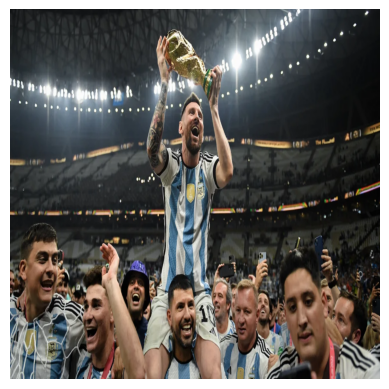

In [18]:
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()

In [15]:

temperature = 0.7
max_new_tokens = 512

with torch.inference_mode():
    output_ids = model.generate(
        input_ids,
        images=image_tensor,
        do_sample=True,
        temperature=temperature,
        max_new_tokens=max_new_tokens,
        streamer=streamer,
        use_cache=True,
        stopping_criteria=[stopping_criteria])

outputs = tokenizer.decode(output_ids[0, input_ids.shape[1]:]).strip()
print(outputs)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


The image shows a soccer player being held up on the shoulders of a crowd at a stadium. The player is wearing a jersey and is standing on one foot while holding up a trophy in the air. The crowd of fans is surrounding him, with some of them holding up their cell phones to capture the moment.
There are several chairs visible in the scene, likely placed for spectators or support staff. A handbag can also be seen in the image near one of the chairs.
The image shows a soccer player being held up on the shoulders of a crowd at a stadium. The player is wearing a jersey and is standing on one foot while holding up a trophy in the air. The crowd of fans is surrounding him, with some of them holding up their cell phones to capture the moment.
There are several chairs visible in the scene, likely placed for spectators or support staff. A handbag can also be seen in the image near one of the chairs.</s>


In [19]:

temperature = 0.1
max_new_tokens = 100

with torch.inference_mode():
    output_ids = model.generate(
        input_ids,
        images=image_tensor,
        do_sample=True,
        temperature=temperature,
        max_new_tokens=max_new_tokens,
        streamer=streamer,
        use_cache=False,
        stopping_criteria=[stopping_criteria])

outputs = tokenizer.decode(output_ids[0, input_ids.shape[1]:]).strip()
print(outputs)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


The image captures a lively scene at a soccer stadium, where a group of people are gathered to celebrate a victory. A man is holding a trophy, possibly the World Cup, and is being lifted by the crowd. The stadium is filled with fans, some of whom are taking pictures and cheering for the winning team.
There are numerous people in the scene, with some standing closer to the foreground and others further back. The atmosphere is energetic and
The image captures a lively scene at a soccer stadium, where a group of people are gathered to celebrate a victory. A man is holding a trophy, possibly the World Cup, and is being lifted by the crowd. The stadium is filled with fans, some of whom are taking pictures and cheering for the winning team.
There are numerous people in the scene, with some standing closer to the foreground and others further back. The atmosphere is energetic and



# Functions

In [78]:

def predict(query, image_file):
  ''' Assumes model is already loaded and part of global scope '''

  conv = conv_templates["mplug_owl2"].copy()
  roles = conv.roles

  image = Image.open(image_file).convert('RGB')
  max_edge = max(image.size) # We recommand you to resize to squared image for BEST performance.
  image = image.resize((max_edge, max_edge))

  image_tensor = process_images([image], image_processor)
  image_tensor = image_tensor.to(model.device, dtype=torch.float16)

  inp = DEFAULT_IMAGE_TOKEN + query
  conv.append_message(conv.roles[0], inp)
  conv.append_message(conv.roles[1], None)
  prompt = conv.get_prompt()

  input_ids = tokenizer_image_token(prompt, tokenizer, IMAGE_TOKEN_INDEX, return_tensors='pt').unsqueeze(0).to(model.device)
  stop_str = conv.sep2
  keywords = [stop_str]
  stopping_criteria = KeywordsStoppingCriteria(keywords, tokenizer, input_ids)
  streamer = TextStreamer(tokenizer, skip_prompt=True, skip_special_tokens=True)


  temperature = 0.7
  max_new_tokens = 150

  with torch.inference_mode():
      output_ids = model.generate(
          input_ids,
          images=image_tensor,
          do_sample=True,
          temperature=temperature,
          max_new_tokens=max_new_tokens,
          streamer=streamer,
          use_cache=False,
          stopping_criteria=[stopping_criteria],
          pad_token_id=tokenizer.pad_token_id)

  outputs = tokenizer.decode(output_ids[0, input_ids.shape[1]:]).strip()
  #print(outputs)



# Experiments:

## Experiment 1: Messi - World Cup

In [81]:
image_file = '/content/MESSI.jpg'

What is the name of the main player in the picture?


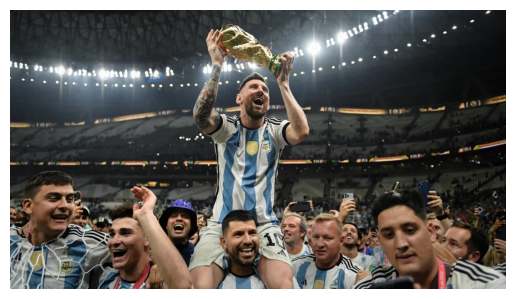

The main player in the picture is Lionel Messi.


In [66]:
query = "What is the name of the main player in the picture?"

print(query)
img_tmp = Image.open(image_file)
plt.imshow(img_tmp)
plt.axis('off')  # Hide the axis
plt.show()


predict(query, image_file)

In [82]:
query = "Who is Lionel Messi?"
predict(query, image_file)

Lionel Messi is a renowned professional football player from Argentina, widely regarded as one of the greatest soccer players of all time. He is the captain of the Argentina national team and has played for prominent clubs such as Barcelona and the Argentina national team. Messi is known for his exceptional skills, speed, and creativity on the field, earning him numerous awards, including seven Ballon d'Or titles and four UEFA Champions League titles.


In [83]:
query = "Describe the image in detail?"
predict(query, image_file)

The image captures a joyful moment at a soccer stadium, where a crowd of people is gathered to celebrate with players. The main focus of the scene is a man holding up a trophy, likely celebrating a recent victory. He is surrounded by other players, all smiling and enjoying the moment with the fans.
There are numerous other fans scattered throughout the stadium, each holding their phones and capturing the exciting atmosphere. Some of them are further back in the scene, while others are closer to the foreground. The image conveys a sense of enthusiasm and camaraderie shared among the fans and the players.


In [84]:
query = "What tournament is this picture about?"
predict(query, image_file)

The picture is about the 2014 FIFA World Cup, held in Brazil.


In [85]:
query = "What is Messi holding?"
predict(query, image_file)

Messi is holding the World Cup trophy in his right hand.


In [86]:
query = "Who are the people in the picture?"
predict(query, image_file)

The people in the picture are soccer fans, including a person holding up a cup while standing in a stadium.


In [87]:
query = "Is the trophy in the picture related to the UEFA Champions League?" # Inducing error
predict(query, image_file)

Yes, the trophy in the picture is related to the UEFA Champions League.


In [88]:
query = "Is the trophy in the picture related to the FIFA World Cup?"
predict(query, image_file)

Yes, the trophy in the picture is related to the FIFA World Cup.


## Experiment 2: CR7 - Champions League

In [68]:
image_file = '/content/CR7.jpg'

What is the name of the main player in the picture?


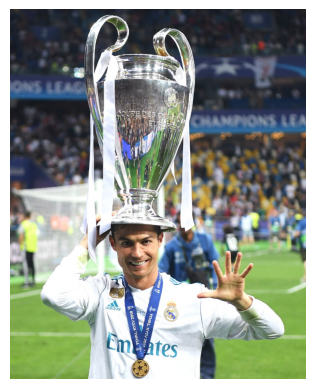

The main player in the picture is Cristiano Ronaldo.


In [53]:
query = "What is the name of the main player in the picture?"

print(query)
img_tmp = Image.open(image_file)
plt.imshow(img_tmp)
plt.axis('off')  # Hide the axis
plt.show()


predict(query, image_file)

In [54]:
query = "Who is Cristiano Ronaldo?"
predict(query, image_file)

Cristiano Ronaldo is a Portuguese professional footballer who is widely considered one of the greatest players of all time. He has won numerous accolades and titles in his long and successful career, including five FIFA World Cups, four UEFA Champions League titles, and numerous individual awards. Ronaldo is known for his incredible skills, speed, agility, and goalscoring ability, and he has played for clubs such as Manchester United, Real Madrid, Juventus, and the Portugal


In [55]:
query = "Describe the image in detail?"
predict(query, image_file)

The image features a soccer player holding up a large trophy, possibly a championship trophy, while standing on a field. The player is wearing a hat, and the crowd is cheering for him. The scene captures the excitement and pride of the victorious moment.


In [56]:
query = "What tournament is this picture about?"
predict(query, image_file)

The picture is about the UEFA Champions League, as indicated by the text in the image.


In [57]:
query = "What is Cristiano holding?"
predict(query, image_file)

Cristiano is holding a trophy.


In [58]:
query = "Who are the people in the picture?"
predict(query, image_file)

The people in the picture are a soccer player, possibly Cristiano Ronaldo, holding a trophy, and a group of fans watching the game.


What is Messi holding?


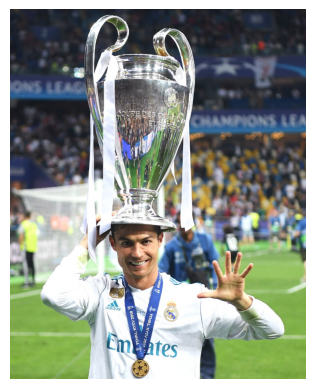

Messi is holding a trophy while standing on a soccer field.


In [52]:
query = "What is Messi holding?" # Inducing error
print(query)
img_tmp = Image.open(image_file)
plt.imshow(img_tmp)
plt.axis('off')
plt.show()
predict(query, image_file)

In [63]:
query = "Is Messi in the picture?"
print(query)
predict(query, image_file)

Is Messi in the picture?
No, Messi is not in the picture. The image features soccer player Cristiano Ronaldo holding a trophy while posing for a picture.


### Could the model predict if its answer was incorrect?

Given the question: 
'What is Messi holding?'
 and the answer: 
'Messi is holding a trophy while standing on a soccer field.'
 is this the answer correct for this question given the input image? Provide a yes or no answer.


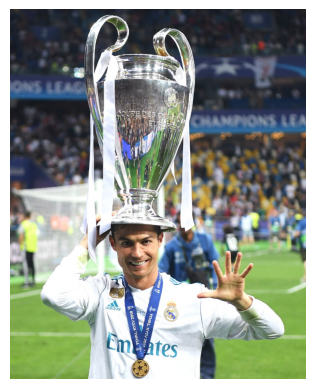

No


In [70]:
query = "Given the question: \n'What is Messi holding?'\n and the answer: \n'Messi is holding a trophy while standing on a soccer field.'\n is this the answer correct for this question given the input image? Provide a yes or no answer."
print(query)
img_tmp = Image.open(image_file)
plt.imshow(img_tmp)
plt.axis('off')
plt.show()
predict(query, image_file)

Given the question: 
'What is Messi holding?'
 and the answer: 
'Messi is holding a trophy while standing on a soccer field.'
 is this the answer correct for this question given the input image? If not, explain why.


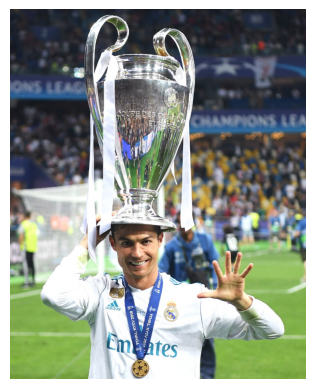

No, the answer is not correct for the given question. The correct answer should be: Messi is holding a cup while standing on a soccer field.


In [71]:
query = "Given the question: \n'What is Messi holding?'\n and the answer: \n'Messi is holding a trophy while standing on a soccer field.'\n is this the answer correct for this question given the input image? If not, explain why."
print(query)
img_tmp = Image.open(image_file)
plt.imshow(img_tmp)
plt.axis('off')
plt.show()
predict(query, image_file)

It seems the model is capable of udnerstanding that the answer is not correct. However, it still struggles to understand why.

What about a correct match?

Given the question: 
'What is Cristiano holding?'
 and the answer: 
'Cristiano is holding a trophy.'
 is this the answer correct for this question given the input image? Provide a yes or no answer.


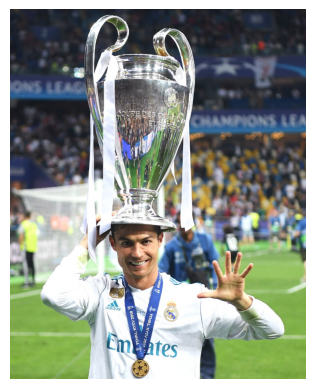

Yes


In [72]:
query = "Given the question: \n'What is Cristiano holding?'\n and the answer: \n'Cristiano is holding a trophy.'\n is this the answer correct for this question given the input image? Provide a yes or no answer."
print(query)
img_tmp = Image.open(image_file)
plt.imshow(img_tmp)
plt.axis('off')  # Hide the axis
plt.show()
predict(query, image_file)

Given the question: 
'What is Cristiano holding?'
 and the answer: 
'Cristiano is holding a trophy.'
 is this the answer correct for this question given the input image? Explain why.


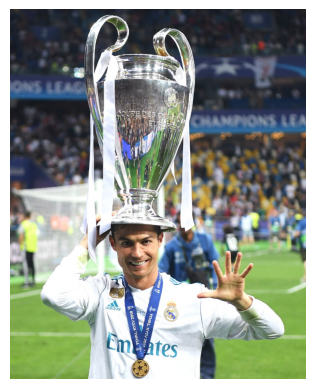

Yes, the answer is correct. In the image, Cristiano is holding a large trophy, which is a symbol of success and achievement in sports. The trophy he is holding is not a regular cup or a bottle, but a highly decorated and valuable award that signifies his accomplishment.


In [75]:
query = "Given the question: \n'What is Cristiano holding?'\n and the answer: \n'Cristiano is holding a trophy.'\n is this the answer correct for this question given the input image? Explain why."
print(query)
img_tmp = Image.open(image_file)
plt.imshow(img_tmp)
plt.axis('off')  # Hide the axis
plt.show()
predict(query, image_file)

Does it understand the difference between World Cup and Champions League?

In [80]:
query = "Is the trophy in the picture related to the World Cup?"
print(query)
predict(query, image_file)

Is the trophy in the picture related to the World Cup?
Yes, the trophy in the picture is related to the World Cup, as it has the FIFA World Cup logo on it.


Given the question: 
'Is the trophy in the picture related to the World Cup?'
 and the answer: 
'Yes.'
 is this the correct answer for this question given the input image? Explain why.


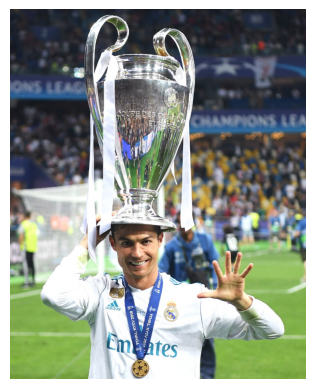

Yes, the correct answer is 'Yes'. The trophy in the image is related to the World Cup. The trophy is a large silver cup, which is the FIFA World Cup trophy. The man holding the trophy is wearing a jersey with the word "Emirates" on it, which further supports the fact that he is wearing a jersey representing the Emirates airline, and it is a sponsor of the FIFA World Cup. The player is likely a member of a team that participated in the World Cup, and the trophy is a symbol of their achievement.


In [79]:
query = "Given the question: \n'Is the trophy in the picture related to the World Cup?'\n and the answer: \n'Yes.'\n is this the correct answer for this question given the input image? Explain why."
print(query)
img_tmp = Image.open(image_file)
plt.imshow(img_tmp)
plt.axis('off')
plt.show()
predict(query, image_file)